# Importing Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly.express as px

In [86]:
#Creating a path and importing my Chocolate dataframe
path = r'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'
path

'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'

In [87]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Cleaned_ChocolateBarRating.csv'))

In [88]:
#Importing the World Country dataframe
World_countries = r'/users/divyaneopaney/Downloads/world.countries.json'

# Georgraphic Visualizations 

In [90]:
f = open(r'/users/divyaneopaney/Downloads/world.countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [91]:
df.head

<bound method NDFrame.head of      Company  (Maker-if known)             BarName   REF  ReviewDate  \
0                     A. Morin         Agua Grande  1876        2016   
1                     A. Morin               Kpime  1676        2015   
2                     A. Morin              Atsane  1676        2015   
3                     A. Morin               Akata  1680        2015   
4                     A. Morin              Quilla  1704        2015   
...                        ...                 ...   ...         ...   
1790                    Zotter                Peru   647        2011   
1791                    Zotter               Congo   749        2011   
1792                    Zotter        Kerala State   749        2011   
1793                    Zotter        Kerala State   781        2011   
1794                    Zotter  Brazil, Mitzi Blue   486        2010   

      CocoaPercent Location  Rating   BeanType BroadOrigin  
0             63.0   France    3.75    Unkno

In [92]:
#Droping some columns that aren't related to the EDA
df.drop(columns=[col for col in ['REF', 'BarName'] if col in df.columns], inplace=True)

In [93]:
#Checking to see if the column dropped
print(df.columns)

Index(['Company  (Maker-if known)', 'ReviewDate', 'CocoaPercent', 'Location',
       'Rating', 'BeanType', 'BroadOrigin'],
      dtype='object')


In [94]:
# 1. Standardizing all column names by replacing \xa0 with a regular space and removing any leading or trailing whitespace.
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]
# 2. Now renamaing the company/cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

In [95]:
#Double checking for any null values
#It's shwoing that BroadOrigin has 1 null value, which I am going to let it be for now. 
df.isnull().sum()

Company         0
ReviewDate      0
CocoaPercent    0
Location        0
Rating          0
BeanType        0
BroadOrigin     1
dtype: int64

In [96]:
# Duplicates check
dups = df.duplicated()
dups

0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Length: 1795, dtype: bool

In [97]:
# Rechecking the data types
df.dtypes

Company          object
ReviewDate        int64
CocoaPercent    float64
Location         object
Rating          float64
BeanType         object
BroadOrigin      object
dtype: object

In [98]:
df.columns = df.columns.str.strip()

In [99]:
#Renaming the column BroadOrigin to Country to match the Json file.
df.rename(columns={'BroadOrigin': 'Country'}, inplace=True)
print(df.columns)

Index(['Company', 'ReviewDate', 'CocoaPercent', 'Location', 'Rating',
       'BeanType', 'Country'],
      dtype='object')


In [100]:
# Reloading the GeoJSON file to ensure it’s interpreted as a dictionary.
import json
json_path = r'/users/divyaneopaney/Downloads/world.countries.json'
with open(json_path, 'r') as f:
    World_countries = json.load(f)

In [101]:
#Checking on some sample values
print("Sample countries in data:", df['Country'].unique()[:10])
print("Sample names in GeoJSON:", [f['properties']['name'] for f in World_countries['features'][:10]])

Sample countries in data: ['Sao Tome' 'Togo' 'Peru' 'Venezuela' 'Cuba' 'Panama' 'Madagascar'
 'Brazil' 'Ecuador' 'Colombia']
Sample names in GeoJSON: ['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antarctica', 'French Southern and Antarctic Lands', 'Australia', 'Austria']


In [102]:
# Calculating the average chocolate rating for each country and storing it in the new DataFrame
country_ratings = df.groupby('Country')['Rating'].mean().reset_index(name='AvgRating')

In [103]:
#Checking
country_ratings.head

<bound method NDFrame.head of                       Country  AvgRating
0   Africa, Carribean, C. Am.   2.750000
1                   Australia   3.250000
2                      Belize   3.234694
3                     Bolivia   3.197368
4                      Brazil   3.284483
..                        ...        ...
95        Venezuela, Trinidad   2.500000
96           Venezuela/ Ghana   3.500000
97                    Vietnam   3.315789
98                West Africa   2.583333
99                              2.955479

[100 rows x 2 columns]>

In [104]:
# Creating a world map centered roughly at [20, 0] with zoom level 2
m = folium.Map(location=[20, 0], zoom_start=2)

# Add a choropleth layer to color countries by average chocolate rating
folium.Choropleth(
    geo_data=World_countries,               
    data=country_ratings,             
    columns=['Country', 'AvgRating'],
    key_on='feature.properties.name', 
    fill_color='YlOrRd',              
    fill_opacity=0.7,                 
    line_opacity=0.2,                 
    nan_fill_color='white',           
    legend_name='Average Chocolate Rating' 
).add_to(m)
# Adding layer control
folium.LayerControl().add_to(m)
# Displaying the map
m

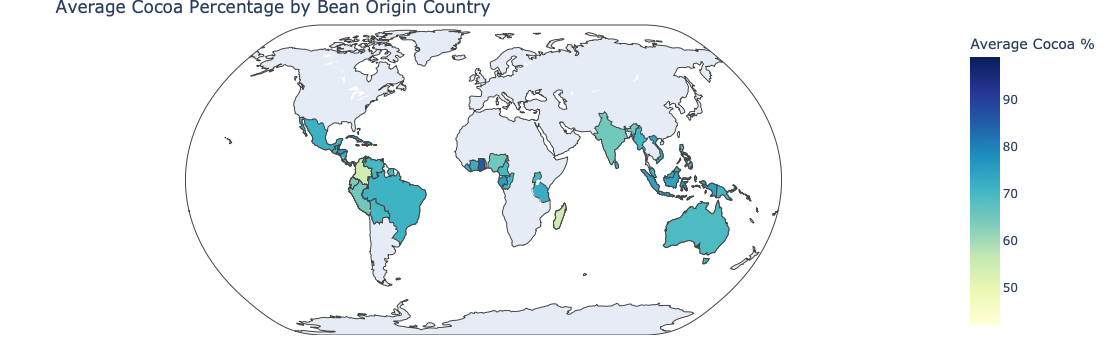

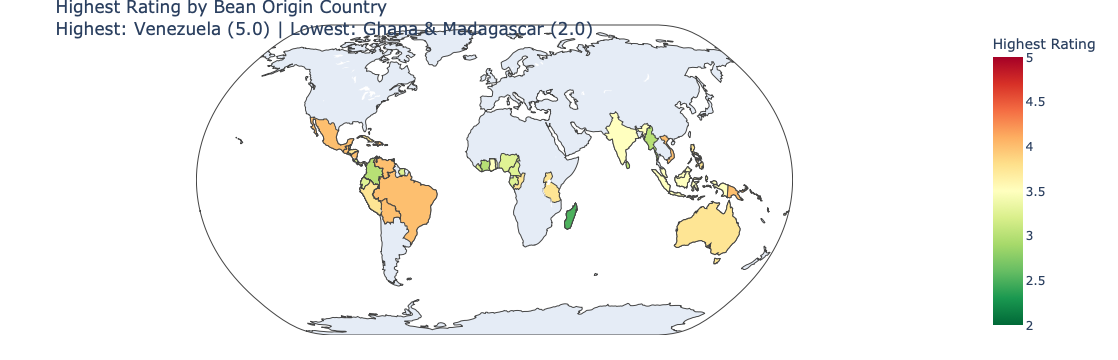

In [117]:
# Cleaning the column names
df.columns = df.columns.str.strip()
# Average cocoa percentage by origin country
avg_cocoa_per_origin = df.groupby('Country')['CocoaPercent'].mean().reset_index()
# Highest rating by origin country
max_rating_per_origin = df.groupby('Country')['Rating'].max().reset_index()
# Identify countries with highest and lowest rating
highest_rating_origin = max_rating_per_origin.loc[max_rating_per_origin['Rating'].idxmax()]
lowest_rating_origin = max_rating_per_origin.loc[max_rating_per_origin['Rating'].idxmin()]

#  Map 1: Average Cocoa Percentage 
fig3 = px.choropleth(avg_cocoa_per_origin, 
                     locations='Country', 
                     locationmode='country names',
                     color='CocoaPercent',
                     hover_name='Country',
                     color_continuous_scale='YlGnBu',
                     projection='natural earth',
                     labels={'CocoaPercent': 'Average Cocoa %'},
                     title='Average Cocoa Percentage by Bean Origin Country')
fig3.update_layout(margin={"r":25, "t":25, "l":25, "b":25})

# Map 2: Highest Rating
title_text = (f'Highest Rating by Bean Origin Country<br>'
              f'Highest: {highest_rating_origin["Country"]} ({highest_rating_origin["Rating"]}) | '
              f'Lowest: {lowest_rating_origin["Country"]} ({lowest_rating_origin["Rating"]})')

fig4 = px.choropleth(max_rating_per_origin, 
                     locations='Country', 
                     locationmode='country names',
                     color='Rating',
                     hover_name='Country',
                     color_continuous_scale='RdYlGn_r',  # reversed so green = high rating
                     projection='natural earth',
                     labels={'Rating': 'Highest Rating'},
                     title=title_text)
fig4.update_layout(margin={"r":25, "t":25, "l":25, "b":25})

# Display both maps
display(fig3)
display(fig4)

# Does the analysis answer any of your existing research questions?

# New Question